In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
# Membaca data lokasi toko Chipotle
chipotle = pd.read_csv('/content/chipotle_stores.csv')

In [ ]:
import os
os.environ["SHAPE_RESTORE_SHX"] = "YES"

import geopandas as gpd
gdf = gpd.read_file("/content/usa-states-census-2014.shp")

In [ ]:
gdf.head()

,geometry
0,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


<Axes: >

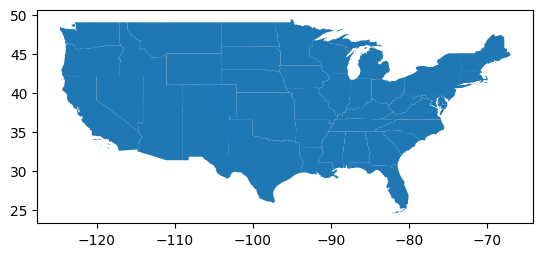

In [ ]:
gdf.plot()

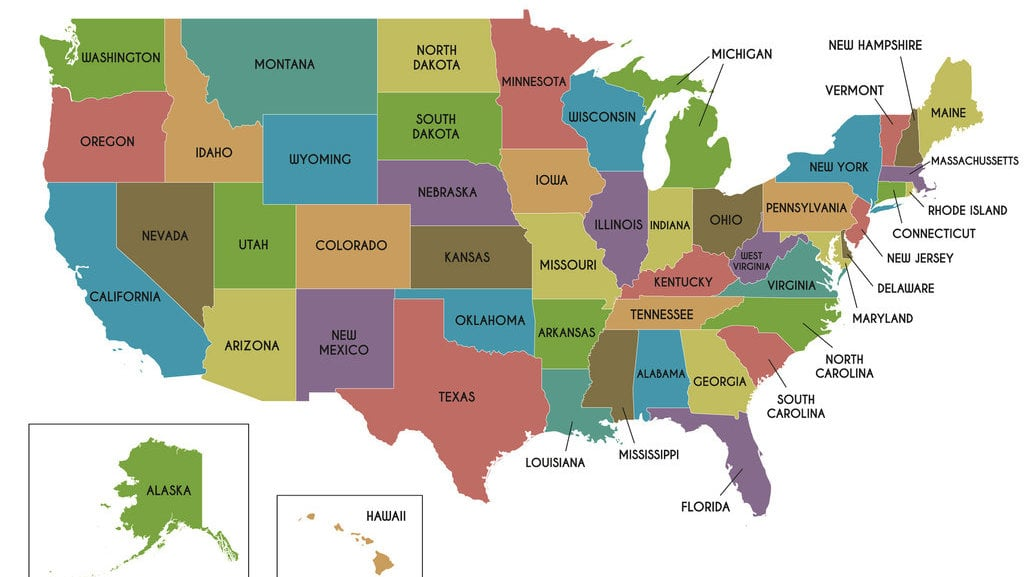

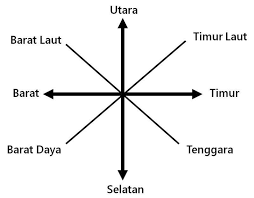

In [ ]:
chipotle.head()

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220


In [ ]:
geometry = gpd.points_from_xy(chipotle['longitude'], chipotle['latitude'])
chipotle_gdf = gpd.GeoDataFrame(chipotle, geometry=geometry)

In [ ]:
geometry

<GeometryArray>
[ <POINT (-85.487 32.607)>,   <POINT (-86.803 33.51)>,
  <POINT (-86.647 33.596)>,  <POINT (-86.698 33.423)>,
  <POINT (-86.841 34.154)>,  <POINT (-86.804 33.379)>,
  <POINT (-86.666 34.742)>,  <POINT (-88.144 30.675)>,
  <POINT (-88.225 30.683)>,  <POINT (-86.162 32.359)>,
 ...
  <POINT (-88.128 43.188)>,  <POINT (-89.529 43.075)>,
  <POINT (-87.948 42.986)>,  <POINT (-87.905 43.048)>,
   <POINT (-87.849 42.72)>,  <POINT (-87.921 42.566)>,
  <POINT (-88.048 43.068)>,  <POINT (-96.797 46.904)>,
  <POINT (-96.861 46.855)>, <POINT (-104.806 41.161)>]
Length: 2629, dtype: geometry

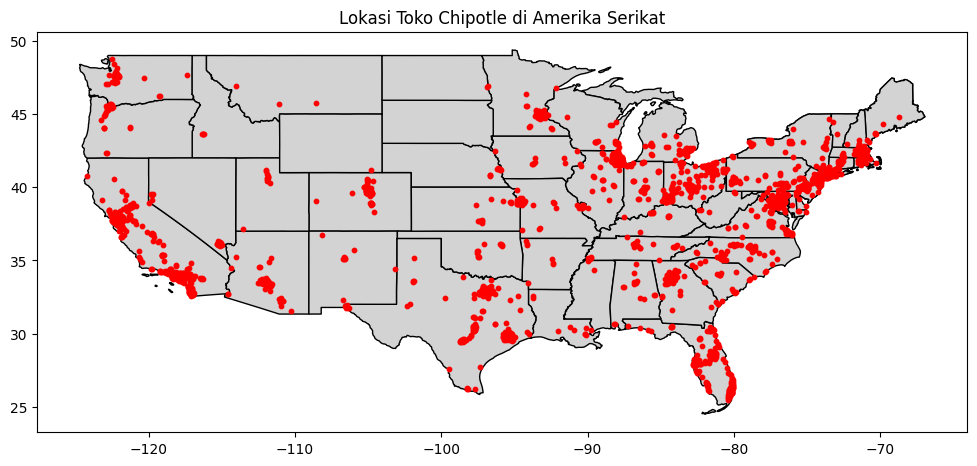

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')
chipotle_gdf.plot(ax=ax, color='red', markersize=10)
plt.title('Lokasi Toko Chipotle di Amerika Serikat')
plt.show()

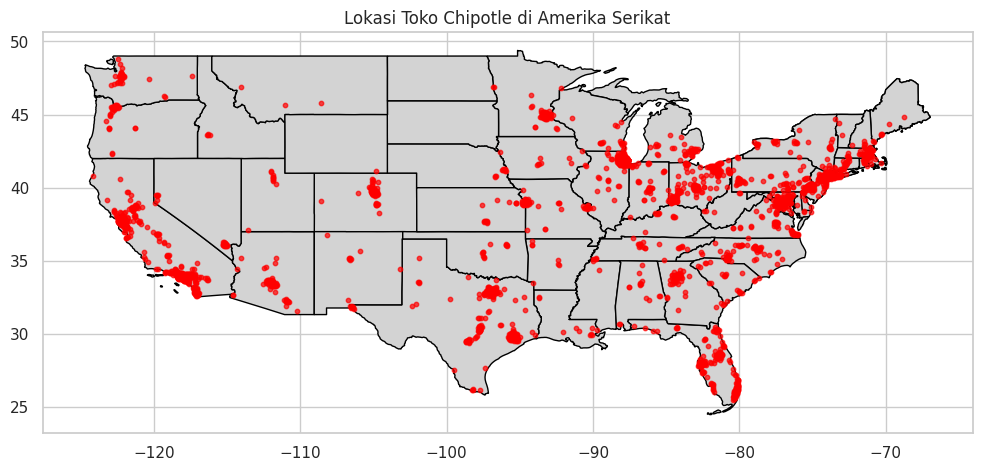

In [ ]:
sns.set_style("whitegrid")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')
chipotle_gdf.plot(ax=ax, color='red', markersize=10, alpha=0.7)
plt.title('Lokasi Toko Chipotle di Amerika Serikat')
plt.show()

# Text

In [ ]:
chipotle_gdf.head()

,state,location,address,latitude,longitude,geometry
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328,POINT (-85.48733 32.60681)
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756,POINT (-86.80276 33.50972)
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437,POINT (-86.64744 33.59558)
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279,POINT (-86.69828 33.42258)
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220,POINT (-86.84122 34.15413)


In [ ]:
chipotle_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2629 entries, 0 to 2628
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   state      2629 non-null   object  
 1   location   2629 non-null   object  
 2   address    2629 non-null   object  
 3   latitude   2629 non-null   float64 
 4   longitude  2629 non-null   float64 
 5   geometry   2629 non-null   geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 123.4+ KB


In [ ]:
chipotle_gdf['state'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'Washington DC',
       'West Virginia', 'Wisconsin', 'North Dakota', 'Wyoming'],
      dtype=object)

<ipython-input-50-2958a8b5722f>:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(colormap)  # Use plt.cm.get_cmap for clearer API


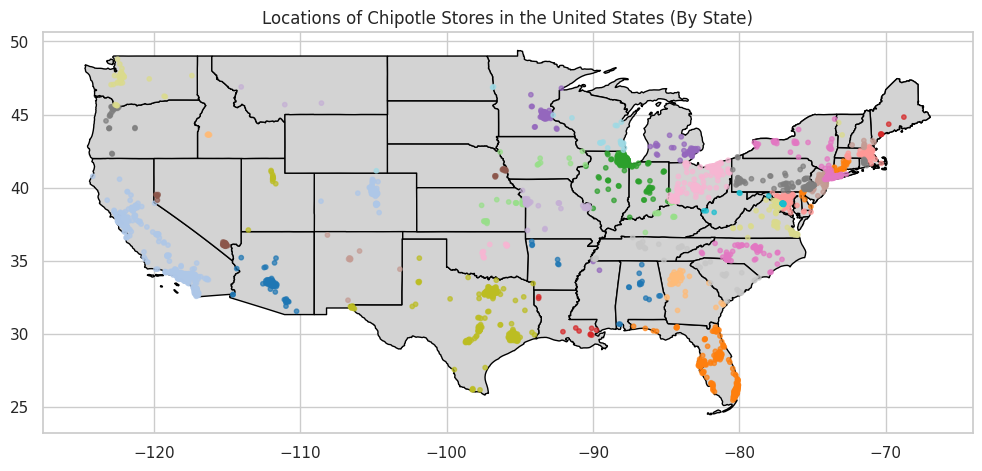

In [ ]:
import matplotlib.colors as mcolors

def generate_colors(num_colors, colormap='tab20'):
    """
    Generates a list of unique colors from a specified colormap.

    Args:
        num_colors (int): The number of unique colors to generate.
        colormap (str, optional): The name of the colormap to use. Defaults to 'tab20'.

    Returns:
        list: A list of hex color codes (strings).
    """

    cmap = plt.cm.get_cmap(colormap)  # Use plt.cm.get_cmap for clearer API
    return [mcolors.to_hex(cmap(i / (num_colors - 1)))  # Normalize index for even distribution
             for i in range(num_colors)]

# Number of unique states in your data
num_states = chipotle_gdf['state'].nunique()

# Generate colors for each unique state
colors = generate_colors(num_states)

# Create a color dictionary (assuming 'state' is the column for state names)
color_dict = dict(zip(chipotle_gdf['state'].unique(), colors))

# Map states to colors in your geodataframe
chipotle_gdf['color'] = chipotle_gdf['state'].map(color_dict)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base map in light gray with black borders
gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot the Chipotle stores with assigned colors, marker size, and transparency
chipotle_gdf.plot(ax=ax, color=chipotle_gdf['color'], markersize=10, alpha=0.7, legend=True)

# Add a title in your preferred language (replace with your translation)
plt.title('Locations of Chipotle Stores in the United States (By State)')
plt.show()

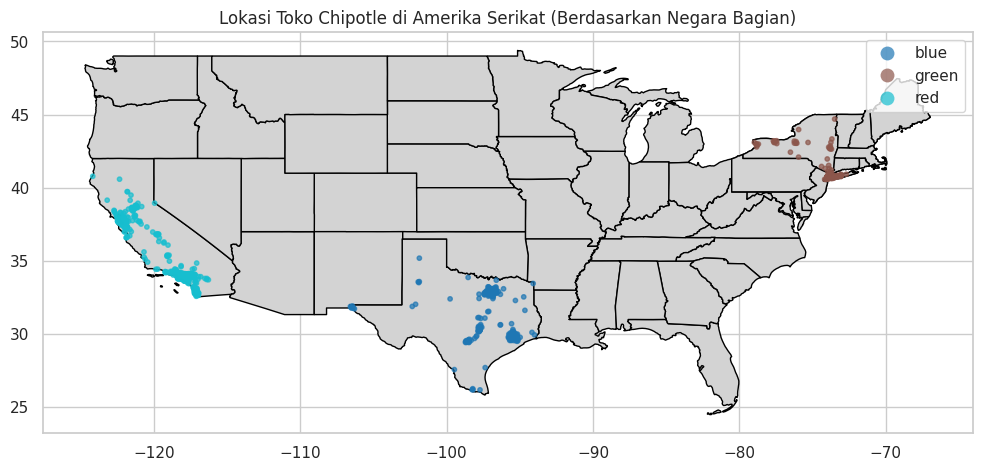

In [ ]:
# Membuat dictionary untuk memetakan state ke warna
color_dict = {'California': 'red', 'Texas': 'blue', 'New York': 'green'}

# Membuat kolom baru untuk warna berdasarkan dictionary
chipotle_gdf['color'] = chipotle_gdf['state'].map(color_dict)

# Membuat plot dengan warna berdasarkan kolom 'color'
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='lightgray', edgecolor='black')
chipotle_gdf.plot(ax=ax, column='color', legend=True, markersize=10, alpha=0.7)
plt.title('Lokasi Toko Chipotle di Amerika Serikat (Berdasarkan Negara Bagian)')
plt.show()

In [ ]:
'''
# Mengonversi DataFrame ke GeoDataFrame
# Pastikan kolom latitude dan longitude ada di dalam data chipotle
chipotle_gdf = gpd.GeoDataFrame(
    chipotle, geometry=gpd.points_from_xy(chipotle.longitude, chipotle.latitude))

# Plotting peta USA
fig, ax = plt.subplots(figsize=(10, 15))
usa.plot(ax=ax, color='lightgray')

# Plotting lokasi toko Chipotle di atas peta USA
chipotle_gdf.plot(ax=ax, color='red', markersize=5, label='Chipotle Stores')

# Memberi judul dan menampilkan plot
plt.title('Chipotle Store Locations in the USA')
plt.legend()
plt.show()